# Background

This project aims to further improve the airline's services to it's customers by analyzing the rating of passengers' satisfaction. In this way, we can assure our loyal customers to continue availing the airline's services and invite new customers to shift in availing our services. 

# Problem Statement

The airline wants to identify what specific services they can improve through a survey conducted for the customers. This information will help the company for their future plans in improving their services. In this way, the company will not lose their loyal customers and will attract new customers thereby, increasing sales and profit of the company.

As a data analyst, we will answer the question "What services of the airline can futher be improved to satisfy the needs of our current customers and to attract new customers to increase sales and profit?" 

# Data

To answer the question, we will analyze the data of participants from previous survey. The dataset can be accessed [here](https://drive.google.com/drive/folders/1oxg2zyQsRCPy5FP8PlDSGtlw9sz06glB).

In [143]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



The dataset consists of demographics and rating that was filled by the customers when surveyed for their experience during their flight. There are 14 columns in the dataset, which are:  


* id: Unique ID of each passengers
* Gender: Male or Female
* Customer Type: Loyal or Disloyal
* Age
* Type of Travel: Business or Personal
* Class: Eco Plus, Business, Eco
* Flight Distance
* Customer Satisfaction based on experience:
    - Inflight wifi service
    - Departure/Arrival time convenient
    - Ease of Online booking
    - Gate location
    - Food and drink
    - Online boarding
    - Seat comfort
    - In-flight entertainment
    - On-board service
    - Leg room service
    - Baggage handling
    - Checkin service
    - Inflight service
    - Cleanliness
* Departure Delay (in Minutes)
* Arrival Delay (in Minutes)
* Overall Satisfaction : Satisfied or Neutral/Dissatisfied

The rating for Customer Experience Satisfaction is as follows:
* 0 - Very Unsatisfactory
* 1 - Unsatisfactory
* 2 - Slightly Unsatisfactory
* 3 - Slightly Satisfactory
* 4 - Satisfactory
* 5 - Very Satisfactory

Here are the samples of the heads and the tails of the data:

In [144]:
df=pd.read_csv('airline passenger satisfaction.csv')
display(df.head(), df.tail())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


## Data Understanding and Cleaning

Before analyzing our data, this process aims to find anomalies in our dataset to be handled in data cleaning process.

First, let's check the information of our dataset.

In [145]:
print(f'The number of rows and columns in df are {df.shape}')
df.info()

The number of rows and columns in df are (103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null

In [146]:
display(df.describe(), df.describe(include='object'))

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [147]:
pd.set_option('display.max_colwidth', None)
# Unique data of each column
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

table1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
table1Desc

,Column Name,Number of Unique,Unique Sample
0,Unnamed: 0,103904,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]"
1,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
2,Gender,2,"[Male, Female]"
3,Customer Type,2,"[Loyal Customer, disloyal Customer]"
4,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
5,Type of Travel,2,"[Personal Travel, Business travel]"
6,Class,3,"[Eco Plus, Business, Eco]"
7,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
8,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
9,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"


In general, we can see that:  
* airline passenger satisfaction dataset has 25 columns and 103904 rows.
* All columns have complete data provided by the passenger except for `Arrival Delay` column.  
* There is an unnamed column which is the same with `id` column. These consisted of unique ID for every survey participant. It is irrelevant to the analysis and can be dropped.
* `Baggage Handling` column has only 5 unique answers as compared to other experience but this should not be a concern. It only means that none rated `0` in this experience.
* `Departure Delay` and `Arrival Delay` column have different data types. We can change `Arrival Delay` to integer data type to make it uniform.


### A. Missing Value

In [148]:
# Missing value percentage in each column
df.isna().sum()/df.shape[0]*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

<AxesSubplot:>

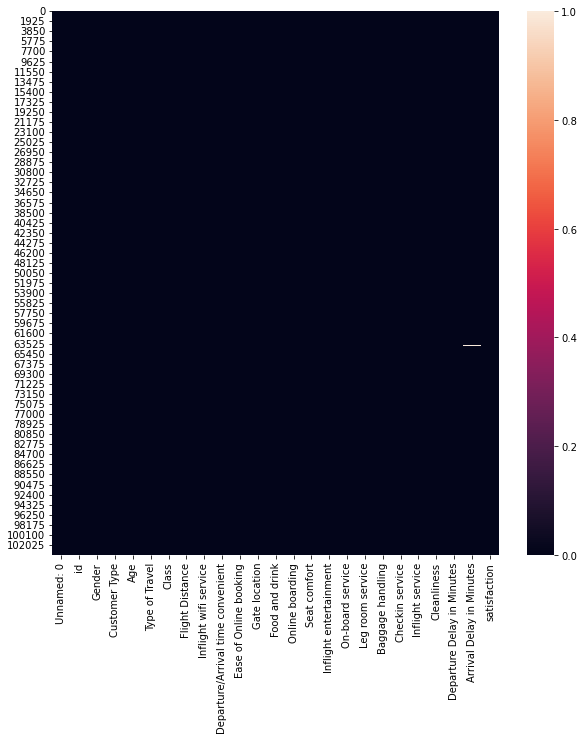

In [149]:
# The distribution of missing values
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

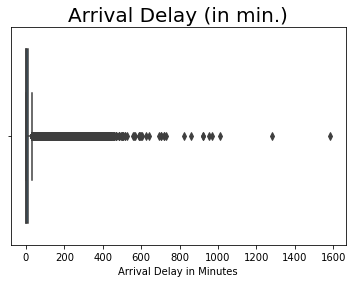

In [150]:
sns.boxplot(x = df["Arrival Delay in Minutes"])
plt.title("Arrival Delay (in min.)", size = 20)
plt.show()

There are three ways we can fill in the missing values in `Arrival Delay in Minutes` columns.
1. We can impute using median. Since our data has many outliers, we cannot use mean imputation.
2. As we can observe in our dataframe, the value of `Departure Delay` is just close to, if not equal to, the value of `Arrival Delay`. With this, for missing values, we can assume that the values in `Arrival Delay` is just equal to the values of its corresponding `Departure Delay`.
3. We can delete the whole column or row with missing values. This one is not advisable.

To fill in the missing values in the `Arrival Delay` column, I will use the second method.


In [151]:
df['Arrival Delay in Minutes'].fillna(df["Departure Delay in Minutes"], inplace = True)

In [152]:
df['Arrival Delay in Minutes'].isna().sum()

0

The missing values are now filled. 

Let's proceed in changing the data type of `Arrival Delay` column from float to integer.

In [153]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

Let us also convert the data in `satisfaction` feature to an integer data type where satisfied = 1 and neutral/dissatisfied = 0. This will make our data to be uniform with other ratings and for ease of analysis.

In [154]:
df['satisfaction'].replace(['satisfied', 'neutral or dissatisfied'],
                        [1, 0], inplace=True)

We can also group the `Age` feature because it is difficult to analyze this feature individually. From below, we can say that the minimum age of passenger who answered the survey is 7 years old and the max is 85 years old. We can group the age by:
* below 20 years old;
* 20-30 years old;
* 31-40 years old;
* 41-50 years old;
* 51-60 years old; and
* above 60 years old.

In [155]:
df['Age'].describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In [156]:
# here we define the threshhold or our age groups
age_groups = [0, 20, 31, 41, 51, 60, 100]

# and for convenience we give each of them a handy label
age_group_names = ['<20', '20-30', '31-40', '41-50', '51-60','>60']

In [157]:
df['Age Group'] = pd.cut(
    df['Age'], bins=age_groups, labels=age_group_names)

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Group
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,4,3,4,4,5,5,25,18,0,<20
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,5,3,1,4,1,1,6,0,20-30
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,4,3,4,4,4,5,0,0,1,20-30
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,5,3,1,4,2,11,9,0,20-30
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,4,4,3,3,3,0,0,1,>60


In [158]:
# shift column 'C' to sixth position
fifth_column = df.pop('Age Group')
  
# insert column using insert(position,column_name,first_column) function
df.insert(5, 'Age Group', fifth_column)

And now, we can drop the columns `unnamed`, `id`, and `age` since they are not useful in our analysis.

In [159]:
df.drop(['Unnamed: 0', 'id', 'Age'], axis = 1, inplace = True)

# Cleaned Dataset



In [160]:
df.head()

,Gender,Customer Type,Age Group,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,<20,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18,0
1,Male,disloyal Customer,20-30,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6,0
2,Female,Loyal Customer,20-30,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,Female,Loyal Customer,20-30,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9,0
4,Male,Loyal Customer,>60,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0,1


In [161]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103904, 23)


,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,object,0,2,"[Male, Female]"
1,Customer Type,object,0,2,"[disloyal Customer, Loyal Customer]"
2,Age Group,category,0,6,"[51-60, 41-50]"
3,Type of Travel,object,0,2,"[Business travel, Personal Travel]"
4,Class,object,0,3,"[Business, Eco]"
5,Flight Distance,int64,0,3802,"[2157, 2606]"
6,Inflight wifi service,int64,0,6,"[0, 5]"
7,Departure/Arrival time convenient,int64,0,6,"[1, 3]"
8,Ease of Online booking,int64,0,6,"[2, 0]"
9,Gate location,int64,0,6,"[4, 0]"


# Data Analysis

We are done with cleaning the data. Now, we can start analyzing the dataset to find out what services of the airline needs improvement.

In [162]:
rating_only = df.drop(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Age Group', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction'], axis = 1)

In [163]:
listItem2 = []
for col in rating_only.columns :
    listItem2.append([col, df[col].mean()]);

dfDesc2 = pd.DataFrame(columns=['Customer Experience', 'Mean Score'],
                     data=listItem2)

dfDesc2

,Customer Experience,Mean Score
0,Inflight wifi service,2.729683
1,Departure/Arrival time convenient,3.060296
2,Ease of Online booking,2.756901
3,Gate location,2.976883
4,Food and drink,3.202129
5,Online boarding,3.250375
6,Seat comfort,3.439396
7,Inflight entertainment,3.358158
8,On-board service,3.382363
9,Leg room service,3.351055


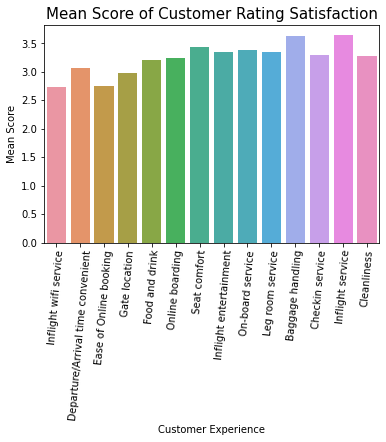

In [164]:
sns.barplot(data = dfDesc2, x = 'Customer Experience', y = 'Mean Score')
plt.title('Mean Score of Customer Rating Satisfaction', size = 15)
plt.xticks(rotation=85)
plt.show()

In [165]:
listItem3 = []
for col in rating_only.columns :
    listItem3.append([col, df[col].mode()[0]]);

dfDesc3 = pd.DataFrame(columns=['Customer Experience', 'Mode Score'],
                     data=listItem3)

dfDesc3

,Customer Experience,Mode Score
0,Inflight wifi service,3
1,Departure/Arrival time convenient,4
2,Ease of Online booking,3
3,Gate location,3
4,Food and drink,4
5,Online boarding,4
6,Seat comfort,4
7,Inflight entertainment,4
8,On-board service,4
9,Leg room service,4


In [166]:
%pip install plot-likert
import plot_likert

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='Percentage of Responses'>

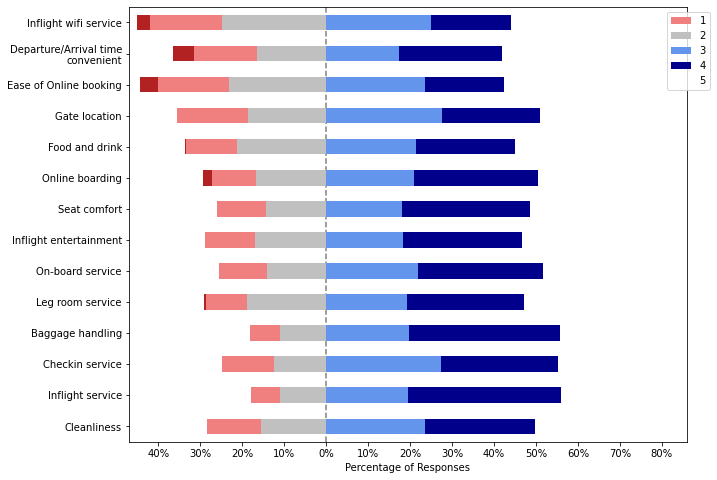

In [167]:
# Define ratings
myscale1 = \
    [0,1,2,3,4,5]

# create a likert plot
plot_likert.plot_likert(rating_only, myscale1, plot_percentage=True, figsize = (10, 8), bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)

Based on the table and graph above, the customer experience that achieved the highest rating are `Inflight Service` followed by `Baggage Handling` with a mean score of *3.64* and *3.63*, respectively. While `Gate location`, `Ease of Online booking`, and `Inflight wifi service` got the lowest mean score of *2.98*, *2.76*, *2.73*, respectively. 

In [168]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [169]:
# Overall Satisfaction Rating

dfDesc3 = pd.DataFrame(columns=['Overall Satisfaction', 'Value Count', 'Percentage'],
                     data = [['Neutral/Dissatisfied', 58879, (58879/103904)*100],['Satisfied', 45025, (45025/103904)*100]])

dfDesc3

,Overall Satisfaction,Value Count,Percentage
0,Neutral/Dissatisfied,58879,56.666731
1,Satisfied,45025,43.333269


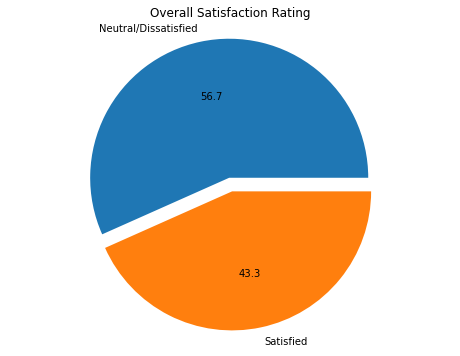

In [170]:
plt.figure(figsize = (8,6))
plt.pie(dfDesc3['Percentage'],
        labels = dfDesc3['Overall Satisfaction'],
        autopct = '%.1f',
        explode = (0, 0.1))
plt.axis('equal')
plt.title('Overall Satisfaction Rating')
plt.show()

<AxesSubplot:xlabel='Percentage of Responses'>

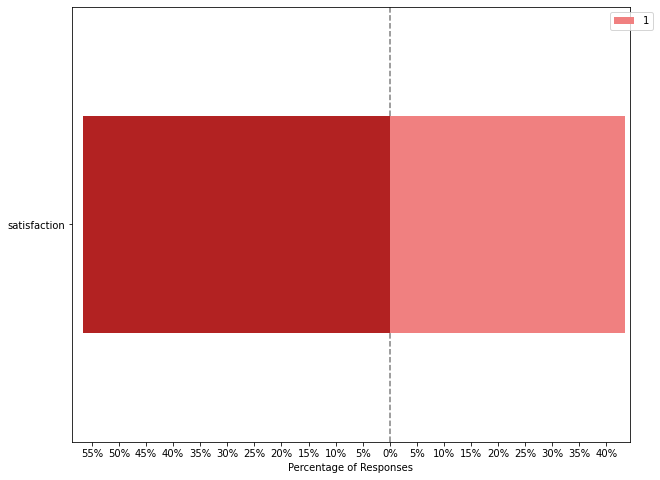

In [171]:
myscale2 = \
    [0, 1]
plot_likert.plot_likert(df['satisfaction'], myscale2, plot_percentage=True, figsize = (10, 8), bar_labels_color="snow")

Based on the table and graph above, most of our respondents or customers are neutral or dissatisfied with their overall experience with a percentage of 56.7% while those that are satisfied with their overall experience are only 43.3%.

# Correlation Tests

We will analyze if the following demographics: Gender, Age Group, Customer Type, Type of Travel, Class and Flight Distance is correlated with the customer's satisfaction.

### Gender 

In [172]:
listCE = ['Inflight wifi service',
        'Departure/Arrival time convenient',
        'Ease of Online booking',
        'Gate location',
        'Food and drink',
        'Online boarding',
        'Seat comfort',
        'Inflight entertainment',
        'On-board service',
        'Leg room service',
        'Baggage handling',
        'Checkin service',
        'Inflight service',
        'Cleanliness',
        'satisfaction'
]

In [173]:
list1 = [df['Gender'].corr(df['Inflight wifi service'], method = 'spearman'),
df['Gender'].corr(df['Departure/Arrival time convenient'], method = 'spearman'),
df['Gender'].corr(df['Ease of Online booking'], method = 'spearman'),
df['Gender'].corr(df['Gate location'], method = 'spearman'),
df['Gender'].corr(df['Food and drink'], method = 'spearman'),
df['Gender'].corr(df['Online boarding'], method = 'spearman'),
df['Gender'].corr(df['Seat comfort'], method = 'spearman'),
df['Gender'].corr(df['Inflight entertainment'], method = 'spearman'),
df['Gender'].corr(df['On-board service'], method = 'spearman'),
df['Gender'].corr(df['Leg room service'], method = 'spearman'),
df['Gender'].corr(df['Baggage handling'], method = 'spearman'),
df['Gender'].corr(df['Checkin service'], method = 'spearman'),
df['Gender'].corr(df['Inflight service'], method = 'spearman'),
df['Gender'].corr(df['Cleanliness'], method = 'spearman'),
df['Gender'].corr(df['satisfaction'], method = 'spearman')]

df_gender = pd.DataFrame(data = list(zip(listCE, list1)),
                        columns = 'Customer_Experience Correlation_with_Gender'.split()
                        )
df_gender

,Customer_Experience,Correlation_with_Gender
0,Inflight wifi service,0.008963
1,Departure/Arrival time convenient,0.009128
2,Ease of Online booking,0.007219
3,Gate location,0.000234
4,Food and drink,0.005918
5,Online boarding,-0.041415
6,Seat comfort,-0.023141
7,Inflight entertainment,0.005963
8,On-board service,0.007213
9,Leg room service,0.030154


### Customer Type

In [174]:
list2 = [df['Customer Type'].corr(df['Inflight wifi service'], method = 'spearman'),
df['Customer Type'].corr(df['Departure/Arrival time convenient'], method = 'spearman'),
df['Customer Type'].corr(df['Ease of Online booking'], method = 'spearman'),
df['Customer Type'].corr(df['Gate location'], method = 'spearman'),
df['Customer Type'].corr(df['Food and drink'], method = 'spearman'),
df['Customer Type'].corr(df['Online boarding'], method = 'spearman'),
df['Customer Type'].corr(df['Seat comfort'], method = 'spearman'),
df['Customer Type'].corr(df['Inflight entertainment'], method = 'spearman'),
df['Customer Type'].corr(df['On-board service'], method = 'spearman'),
df['Customer Type'].corr(df['Leg room service'], method = 'spearman'),
df['Customer Type'].corr(df['Baggage handling'], method = 'spearman'),
df['Customer Type'].corr(df['Checkin service'], method = 'spearman'),
df['Customer Type'].corr(df['Inflight service'], method = 'spearman'),
df['Customer Type'].corr(df['Cleanliness'], method = 'spearman'),
df['Customer Type'].corr(df['satisfaction'], method = 'spearman')]

df_CustomerType = pd.DataFrame(data = list(zip(listCE, list2)),
                        columns = 'Customer_Experience Correlation_with_Customer_Type'.split()
                        )
df_CustomerType

,Customer_Experience,Correlation_with_Customer_Type
0,Inflight wifi service,-0.004519
1,Departure/Arrival time convenient,-0.196464
2,Ease of Online booking,-0.017491
3,Gate location,0.007854
4,Food and drink,-0.056692
5,Online boarding,-0.191377
6,Seat comfort,-0.150910
7,Inflight entertainment,-0.106549
8,On-board service,-0.060161
9,Leg room service,-0.049605


### Age Group

In [175]:
list3 = [df['Age Group'].corr(df['Inflight wifi service'], method = 'spearman'),
df['Age Group'].corr(df['Departure/Arrival time convenient'], method = 'spearman'),
df['Age Group'].corr(df['Ease of Online booking'], method = 'spearman'),
df['Age Group'].corr(df['Gate location'], method = 'spearman'),
df['Age Group'].corr(df['Food and drink'], method = 'spearman'),
df['Age Group'].corr(df['Online boarding'], method = 'spearman'),
df['Age Group'].corr(df['Seat comfort'], method = 'spearman'),
df['Age Group'].corr(df['Inflight entertainment'], method = 'spearman'),
df['Age Group'].corr(df['On-board service'], method = 'spearman'),
df['Age Group'].corr(df['Leg room service'], method = 'spearman'),
df['Age Group'].corr(df['Baggage handling'], method = 'spearman'),
df['Age Group'].corr(df['Checkin service'], method = 'spearman'),
df['Age Group'].corr(df['Inflight service'], method = 'spearman'),
df['Age Group'].corr(df['Cleanliness'], method = 'spearman'),
df['Age Group'].corr(df['satisfaction'], method = 'spearman')]

df_AgeGroup = pd.DataFrame(data = list(zip(listCE, list3)),
                        columns = 'Customer_Experience Correlation_with_Age_Group'.split()
                        )
df_AgeGroup

,Customer_Experience,Correlation_with_Age_Group
0,Inflight wifi service,-0.016827
1,Departure/Arrival time convenient,0.087365
2,Ease of Online booking,-0.014905
3,Gate location,-0.003706
4,Food and drink,-0.019736
5,Online boarding,0.050701
6,Seat comfort,0.046107
7,Inflight entertainment,0.000962
8,On-board service,0.012606
9,Leg room service,-0.000951


### Type of Travel

In [176]:
list4 = [df['Type of Travel'].corr(df['Inflight wifi service'], method = 'spearman'),
df['Type of Travel'].corr(df['Departure/Arrival time convenient'], method = 'spearman'),
df['Type of Travel'].corr(df['Ease of Online booking'], method = 'spearman'),
df['Type of Travel'].corr(df['Gate location'], method = 'spearman'),
df['Type of Travel'].corr(df['Food and drink'], method = 'spearman'),
df['Type of Travel'].corr(df['Online boarding'], method = 'spearman'),
df['Type of Travel'].corr(df['Seat comfort'], method = 'spearman'),
df['Type of Travel'].corr(df['Inflight entertainment'], method = 'spearman'),
df['Type of Travel'].corr(df['On-board service'], method = 'spearman'),
df['Type of Travel'].corr(df['Leg room service'], method = 'spearman'),
df['Type of Travel'].corr(df['Baggage handling'], method = 'spearman'),
df['Type of Travel'].corr(df['Checkin service'], method = 'spearman'),
df['Type of Travel'].corr(df['Inflight service'], method = 'spearman'),
df['Type of Travel'].corr(df['Cleanliness'], method = 'spearman'),
df['Type of Travel'].corr(df['satisfaction'], method = 'spearman')]

df_TravelType = pd.DataFrame(data = list(zip(listCE, list4)),
                        columns = 'Customer_Experience Correlation_with_Travel_Type'.split()
                        )
df_TravelType

,Customer_Experience,Correlation_with_Travel_Type
0,Inflight wifi service,-0.103111
1,Departure/Arrival time convenient,0.265922
2,Ease of Online booking,-0.129575
3,Gate location,-0.030493
4,Food and drink,-0.061399
5,Online boarding,-0.229541
6,Seat comfort,-0.118902
7,Inflight entertainment,-0.143889
8,On-board service,-0.059032
9,Leg room service,-0.139784


### Class

In [177]:
list5 = [df['Class'].corr(df['Inflight wifi service'], method = 'spearman'),
df['Class'].corr(df['Departure/Arrival time convenient'], method = 'spearman'),
df['Class'].corr(df['Ease of Online booking'], method = 'spearman'),
df['Class'].corr(df['Gate location'], method = 'spearman'),
df['Class'].corr(df['Food and drink'], method = 'spearman'),
df['Class'].corr(df['Online boarding'], method = 'spearman'),
df['Class'].corr(df['Seat comfort'], method = 'spearman'),
df['Class'].corr(df['Inflight entertainment'], method = 'spearman'),
df['Class'].corr(df['On-board service'], method = 'spearman'),
df['Class'].corr(df['Leg room service'], method = 'spearman'),
df['Class'].corr(df['Baggage handling'], method = 'spearman'),
df['Class'].corr(df['Checkin service'], method = 'spearman'),
df['Class'].corr(df['Inflight service'], method = 'spearman'),
df['Class'].corr(df['Cleanliness'], method = 'spearman'),
df['Class'].corr(df['satisfaction'], method = 'spearman')]

df_Class = pd.DataFrame(data = list(zip(listCE, list5)),
                        columns = 'Customer_Experience Correlation_with_Class'.split()
                        )
df_Class

,Customer_Experience,Correlation_with_Class
0,Inflight wifi service,-0.025398
1,Departure/Arrival time convenient,0.099582
2,Ease of Online booking,-0.100068
3,Gate location,-0.003662
4,Food and drink,-0.079202
5,Online boarding,-0.327140
6,Seat comfort,-0.221620
7,Inflight entertainment,-0.188409
8,On-board service,-0.216899
9,Leg room service,-0.205960


## Flight Distance

In [178]:
list6 = [df['Flight Distance'].corr(df['Inflight wifi service'], method = 'spearman'),
df['Flight Distance'].corr(df['Departure/Arrival time convenient'], method = 'spearman'),
df['Flight Distance'].corr(df['Ease of Online booking'], method = 'spearman'),
df['Flight Distance'].corr(df['Gate location'], method = 'spearman'),
df['Flight Distance'].corr(df['Food and drink'], method = 'spearman'),
df['Flight Distance'].corr(df['Online boarding'], method = 'spearman'),
df['Flight Distance'].corr(df['Seat comfort'], method = 'spearman'),
df['Flight Distance'].corr(df['Inflight entertainment'], method = 'spearman'),
df['Flight Distance'].corr(df['On-board service'], method = 'spearman'),
df['Flight Distance'].corr(df['Leg room service'], method = 'spearman'),
df['Flight Distance'].corr(df['Baggage handling'], method = 'spearman'),
df['Flight Distance'].corr(df['Checkin service'], method = 'spearman'),
df['Flight Distance'].corr(df['Inflight service'], method = 'spearman'),
df['Flight Distance'].corr(df['Cleanliness'], method = 'spearman'),
df['Flight Distance'].corr(df['satisfaction'], method = 'spearman')]

df_FlightDistance = pd.DataFrame(data = list(zip(listCE, list6)),
                        columns = 'Customer_Experience Correlation_with_Flight_Distance'.split()
                        )
df_FlightDistance

,Customer_Experience,Correlation_with_Flight_Distance
0,Inflight wifi service,0.006456
1,Departure/Arrival time convenient,-0.013443
2,Ease of Online booking,0.066114
3,Gate location,0.000750
4,Food and drink,0.046593
5,Online boarding,0.194100
6,Seat comfort,0.137140
7,Inflight entertainment,0.105091
8,On-board service,0.099600
9,Leg room service,0.118062


### Departure Delay in Minutes

In [179]:
df['Departure Delay in Minutes'].corr(df['satisfaction'], method = 'spearman')

-0.0679132961199924

In [180]:
df['Arrival Delay in Minutes'].corr(df['satisfaction'], method = 'spearman')

-0.10017274245971473

# Conclusion and Recommendation

From the analysis: 
* The top three customer experience that got the lowest mean rating are as follows:
    * Inflight wifi service (2.73)
    * Ease of Online booking (2.76)
    * Gate location (2.98)


* Gender, Customer Type, Age Group and Flight Distance has a weak relationship with all customer experience satisfaction.
* Class has a weak relationship with all customer experience satisfaction except for Online Boarding and Overall Satisfaction which has a negative medium relationship with Class.
* Type of Travel has a weak relationship with all customer experience satisfaction except for Overall Satisfaction which has a negative medium relationship with Type of Travel.
* Departure and Arrival Delays (in minute) has a negative weak relationship with overall satisfaction.


## Recommendations:
1. With the advent of technology, people don't want to disconnected on the internet even while on flight. We need to upgrade or make the inflight wifi speed faster so that our customer will be more satisfied with our service.
2. Make the interface of our online booking user friendly.
3. Lease a gate location that can easily be accessed by passengers.